# Create you own Layer in Tensorflow

In [1]:
# task 1: Import the libraries

import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print("Tensorflow version: "+tf.__version__)

Tensorflow version: 2.2.0


In [4]:
# task 2: Import and visualize the dataset

(x_train, y_train), (x_test, y_test) = utils.load_data() #function in utils library

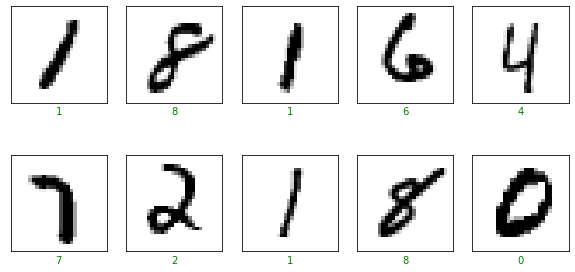

In [5]:
utils.plot_random_examples(x_train, y_train).show()

In [6]:
# task 3: Creating a custom layer

class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name = 'alpha', shape = (1, ),
            initializer = 'zeros',
            trainable = True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)

In [7]:
# task 4: Creating the model 

def create_model(use_prelu = True):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(64, input_shape = (784, )))
    if use_prelu:
        model.add(ParametricRelu())
    else:
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [8]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


In [9]:
# task 5: Model Training

print("Initial Alpha: ", model.layers[1].get_weights())

h = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, )

Initial Alpha:  [array([0.], dtype=float32)]
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.9173 - val_loss: 0.1513 - val_accuracy: 0.9561
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1214 - accuracy: 0.9647 - val_loss: 0.1082 - val_accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9743 - val_loss: 0.0989 - val_accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0671 - accuracy: 0.9795 - val_loss: 0.1027 - val_accuracy: 0.9701
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0915 - val_accuracy: 0.9734


In [10]:
print("alpha after training: ", model.layers[1].get_weights())

alpha after training:  [array([-0.86571985], dtype=float32)]


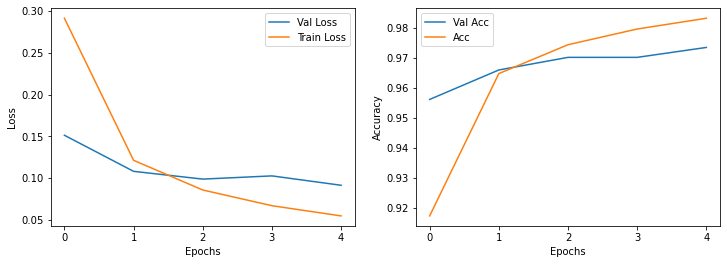

In [11]:
utils.plot_results(h).show()

In [12]:
# task 6: comparison with ReLU

model_2 = create_model(False)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
h2 = model_2.fit(x_train, y_train, 
              validation_data = (x_test, y_test),
              epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.9165 - val_loss: 0.1754 - val_accuracy: 0.9478
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1413 - accuracy: 0.9590 - val_loss: 0.1211 - val_accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9699 - val_loss: 0.1076 - val_accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0813 - accuracy: 0.9755 - val_loss: 0.0892 - val_accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9797 - val_loss: 0.0900 - val_accuracy: 0.9739


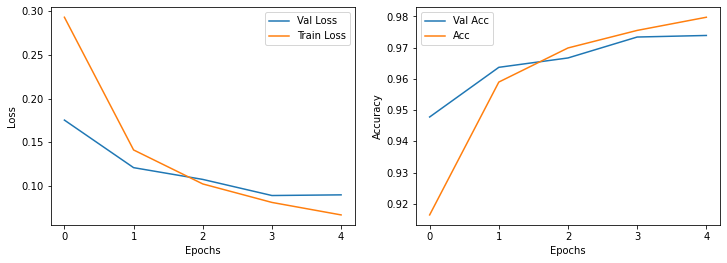

In [17]:
utils.plot_results(h2).show()